In [2]:
#For Data loading and preprocessing
import pandas as pd

#For matrix operations
import numpy as np

#For plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#For splitting the data
from sklearn.model_selection import train_test_split

#For data preprocessing
from sklearn.preprocessing import StandardScaler

#For hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
#For appling LogisticRegression
from sklearn.linear_model import LogisticRegression

#For model/vatiable persistence 
#from sklearn.externals import joblib
#For math operations
import math 

#To see the progress of the iterations
#from tqdm import tqdm

#Performance metrices
from sklearn.metrics import roc_auc_score,roc_curve,auc,log_loss,confusion_matrix

#For encoding the features
from sklearn.preprocessing import LabelEncoder,LabelBinarizer

#For ignoring warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/IBM-EPBL/IBM-Project-8468-1658920292/main/project%20development/Data%20Set/weatherAUS.csv")

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.isnull().any()

Date             False
Location         False
MinTemp           True
MaxTemp           True
Rainfall          True
Evaporation       True
Sunshine          True
WindGustDir       True
WindGustSpeed     True
WindDir9am        True
WindDir3pm        True
WindSpeed9am      True
WindSpeed3pm      True
Humidity9am       True
Humidity3pm       True
Pressure9am       True
Pressure3pm       True
Cloud9am          True
Cloud3pm          True
Temp9am           True
Temp3pm           True
RainToday         True
RainTomorrow      True
dtype: bool

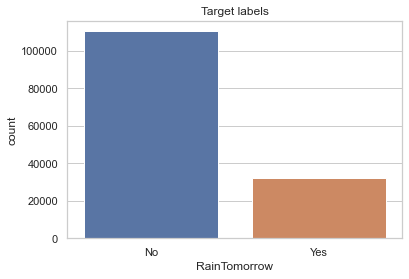

In [8]:
sns.set(style="whitegrid")
sns.countplot(df.RainTomorrow)
plt.title("Target labels")
plt.show()

In [9]:
#Separating the data based on its class label.
data_yes = df[df['RainTomorrow']=='Yes']
data_no = df[df['RainTomorrow']=='No']

In [10]:
#Observing the mode for all columns when RainTomorrow = Yes  
mode_values_for_yes = data_yes.mode()
mode_values_for_yes

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2010-09-03,Portland,9.6,17.2,0.0,4.0,0.0,W,39.0,N,...,99.0,69.0,1014.0,1010.4,8.0,8.0,13.8,16.0,No,Yes


In [11]:
data_no['MaxTemp'].median()

23.3

In [12]:
#For Temparatures we cannot replace NaN values with 0, hence replacing NaN with its respective mode value
data_yes['MinTemp'].fillna(value=data_yes['MinTemp'].mode()[0],inplace=True )
data_no['MinTemp'].fillna(value=data_no['MinTemp'].mode()[0],inplace=True )

data_yes['MaxTemp'].fillna(value=data_yes['MaxTemp'].mode()[0],inplace=True )
data_no['MaxTemp'].fillna(value=data_no['MaxTemp'].mode()[0],inplace=True )


data_yes['Temp9am'].fillna(value=data_yes['Temp9am'].mode()[0],inplace=True )
data_no['Temp9am'].fillna(value=data_no['Temp9am'].mode()[0],inplace=True )

data_yes['Temp3pm'].fillna(value=data_yes['Temp3pm'].mode()[0],inplace=True )
data_no['Temp3pm'].fillna(value=data_no['Temp3pm'].mode()[0],inplace=True )


# For humidity also 
data_yes['Humidity9am'].fillna(value=data_yes['Humidity9am'].mode()[0],inplace=True )
data_no['Humidity9am'].fillna(value=data_no['Humidity9am'].mode()[0],inplace=True )



data_yes['Humidity3pm'].fillna(value=data_yes['Humidity3pm'].mode()[0],inplace=True )
data_no['Humidity3pm'].fillna(value=data_no['Humidity3pm'].mode()[0],inplace=True )

# For the rain fall feature we can replace NaN with 0.0 which says there is no rain fall
data_yes['Rainfall'].fillna(value=0.0,inplace=True)
data_no['Rainfall'].fillna(value=0.0,inplace=True)
data_yes['Pressure9am'].fillna(value=data_yes['Pressure9am'].median(),inplace=True )
data_no['Pressure9am'].fillna(value=data_no['Pressure9am'].median(),inplace=True )

data_yes['Pressure3pm'].fillna(value=data_yes['Pressure3pm'].median(),inplace=True )
data_no['Pressure3pm'].fillna(value=data_no['Pressure3pm'].median(),inplace=True )


data_yes['WindSpeed9am'].fillna(value=data_yes['WindSpeed9am'].median(),inplace=True )
data_no['WindSpeed9am'].fillna(value=data_no['WindSpeed9am'].median(),inplace=True )

data_yes['WindSpeed3pm'].fillna(value=data_yes['WindSpeed3pm'].median(),inplace=True )
data_no['WindSpeed3pm'].fillna(value=data_no['WindSpeed3pm'].median(),inplace=True )

#WindGustSpeed -- replacing with median
data_yes['WindGustSpeed'].fillna(value=data_yes['WindGustSpeed'].median(),inplace=True)
data_no['WindGustSpeed'].fillna(value=data_no['WindGustSpeed'].median(),inplace=True)

In [13]:
# For RainToday feature we cannot fill any value, so better to remove the NaN values 
data_yes.dropna(inplace=True)
data_no.dropna(inplace=True)

In [14]:
data_filled= data_yes.append(data_no, ignore_index=True)

In [15]:
data_filled.isnull().any()

Date             False
Location         False
MinTemp          False
MaxTemp          False
Rainfall         False
Evaporation      False
Sunshine         False
WindGustDir      False
WindGustSpeed    False
WindDir9am       False
WindDir3pm       False
WindSpeed9am     False
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Pressure3pm      False
Cloud9am         False
Cloud3pm         False
Temp9am          False
Temp3pm          False
RainToday        False
RainTomorrow     False
dtype: bool

In [16]:
# sorting the data based on data (Time based splitting)
data_filled=data_filled.sort_values(by='Date')

In [18]:
#Removing unwanted features, RISK_MM is same as target label hence removing with data and loaction  
data_final = data_filled.drop(['Date', 'Location'], axis=1)
data_final

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
3390,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,68.0,29.0,1019.7,1015.0,7.0,7.0,14.4,23.6,No,Yes
3391,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,80.0,36.0,1012.4,1008.4,5.0,3.0,17.5,25.7,Yes,Yes
3392,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,82.0,69.0,1009.5,1007.2,8.0,7.0,15.4,20.2,Yes,Yes
3393,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,62.0,56.0,1005.5,1007.0,2.0,7.0,13.5,14.1,Yes,Yes
23626,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,68.0,49.0,1018.3,1018.5,7.0,7.0,11.1,15.4,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50879,6.3,17.0,0.0,1.6,7.9,E,26.0,SE,SE,4.0,...,75.0,49.0,1028.6,1026.0,1.0,3.0,11.5,15.6,No,No
18595,7.6,19.3,0.0,3.4,9.4,W,35.0,W,W,13.0,...,73.0,32.0,1018.6,1015.4,1.0,1.0,9.4,18.8,No,No
35076,7.9,13.0,0.0,2.8,3.8,NNW,39.0,N,N,15.0,...,68.0,69.0,1017.6,1015.3,7.0,7.0,9.0,11.7,No,No
37396,11.0,24.2,0.0,2.2,9.8,ENE,20.0,SSW,NNE,2.0,...,68.0,53.0,1020.5,1017.3,6.0,3.0,15.9,22.6,No,No


<AxesSubplot:>

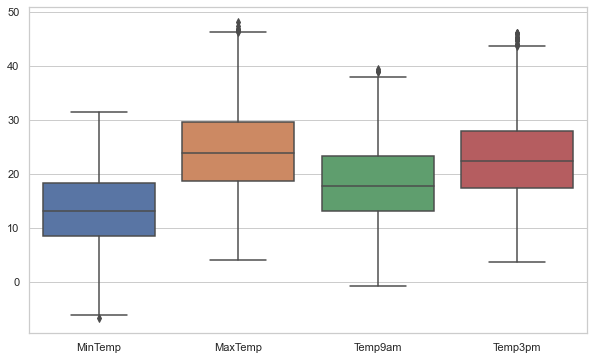

In [19]:
#Outliers we are checking only for numerical features
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_final[['MinTemp','MaxTemp','Temp9am','Temp3pm']])

In [20]:
data_final= data_final[data_final['Humidity3pm']!=0.0]
data_final= data_final[data_final['Humidity9am']!=0.0]

In [21]:
WindGustDir_encode = LabelEncoder()
data_final['WindGustDir']=WindGustDir_encode.fit_transform(data_final['WindGustDir'])

WindDir9am_encode = LabelEncoder()
data_final['WindDir9am']=WindDir9am_encode.fit_transform(data_final['WindDir9am'])

WindDir3pm_encode = LabelEncoder()
data_final['WindDir3pm']=WindDir3pm_encode.fit_transform(data_final['WindDir3pm'])

RainToday_encode = LabelEncoder()
data_final['RainToday']=RainToday_encode.fit_transform(data_final['RainToday'])

RainTomorrow_encode = LabelEncoder()
data_final['RainTomorrow']=RainTomorrow_encode.fit_transform(data_final["RainTomorrow"])

In [22]:
Y= data_final['RainTomorrow']
X = data_final.drop(['RainTomorrow'],axis=1)

In [23]:
column_names=X.columns.tolist()
column_names

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.80,shuffle=False)

In [25]:
scaler= StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
X_test

array([[ 1.92569915,  1.33403259, -0.30534402, ...,  1.71272794,
         1.31675782, -0.53364311],
       [ 1.05731743, -0.23186696, -0.27715516, ...,  0.3852272 ,
        -0.47041152, -0.53364311],
       [ 0.31299024,  0.98924737, -0.30534402, ..., -0.01149715,
         0.83334316, -0.53364311],
       ...,
       [-0.850021  , -1.61100784, -0.30534402, ..., -1.40003241,
        -1.61302798, -0.53364311],
       [-0.36930969, -0.00201014, -0.30534402, ..., -0.347187  ,
        -0.01629472, -0.53364311],
       [-0.74147328, -1.42424918, -0.30534402, ..., -1.35425652,
        -1.36399619, -0.53364311]])

In [27]:
def plotErrors(k,train,cv):
       
    plt.plot(k, train, label='Train logloss')
    plt.plot(k, cv, label='CV logloss')
    plt.legend()
    plt.xlabel("log(C)= -log(λ)")
    plt.ylabel("Neg_Log Loss")
    plt.title("Error Plot for Train and Validation data")
    plt.grid()
    plt.show()


###  Modeling the data using Logisitic Regression
#### Hyper-parameter tuning

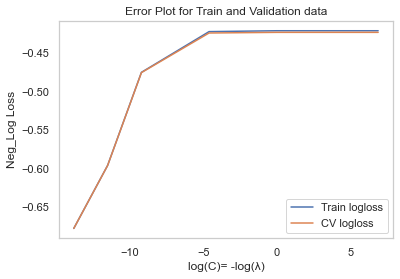

In [28]:
parameters={'C':[10**-6,10**-5,10**-4, 10**-2, 10**0, 10**2, 10**3] }
log_c = list(map(lambda x : float(math.log(x)),parameters['C']))

clf_log = LogisticRegression(penalty='l2',class_weight='balanced')

clf = GridSearchCV(clf_log, parameters, cv=5, scoring='neg_log_loss',return_train_score =True)
clf.fit(X_train, y_train)

train_loss= clf.cv_results_['mean_train_score']
cv_loss = clf.cv_results_['mean_test_score'] 

plotErrors(k=log_c,train=train_loss,cv=cv_loss)

In [29]:
clf = clf.best_estimator_
clf

LogisticRegression(C=1, class_weight='balanced')

In [30]:
#Trainig with the best value of C
clf.fit(X_train, y_train)

LogisticRegression(C=1, class_weight='balanced')

In [31]:
#Printing the log-loss for both trian and test data
train_loss = log_loss(y_train, clf.predict_proba(X_train)[:,1])
test_loss  =log_loss(y_test, clf.predict_proba(X_test)[:,1])


print("Log_loss on train data is :{}".format(train_loss))
print("Log_loss on test data is :{}".format(test_loss))

Log_loss on train data is :0.42136375023317435
Log_loss on test data is :0.42841877762512065


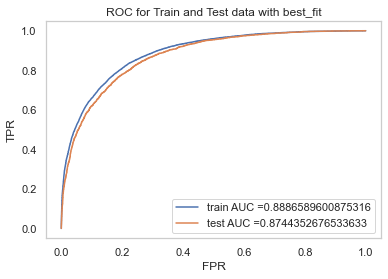

In [32]:
#Plotting AUC 
train_fpr, train_tpr, thresholds = roc_curve(y_train, clf.predict_proba(X_train)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC for Train and Test data with best_fit")
plt.grid()
plt.show()

In [34]:
clf.coef_[0]

array([-0.272718  , -0.01888115,  0.10988243, -0.06915256, -0.62728539,
        0.12245798,  0.84953389, -0.03214127, -0.03536307, -0.09534929,
       -0.24119127,  0.06394845,  1.1370843 ,  0.99791459, -1.41556721,
       -0.09055778,  0.30180472,  0.26363375,  0.12924531,  0.17698128])

In [35]:
feature_weights=sorted(zip(clf.coef_[0],column_names),reverse = True)

In [36]:
feature_weights

[(1.1370843017052434, 'Humidity3pm'),
 (0.997914591510364, 'Pressure9am'),
 (0.8495338941550139, 'WindGustSpeed'),
 (0.301804715097945, 'Cloud3pm'),
 (0.26363374793340466, 'Temp9am'),
 (0.17698127687170961, 'RainToday'),
 (0.12924531089312957, 'Temp3pm'),
 (0.12245797502584098, 'WindGustDir'),
 (0.10988243259883834, 'Rainfall'),
 (0.0639484471328506, 'Humidity9am'),
 (-0.018881148137894623, 'MaxTemp'),
 (-0.03214126563471105, 'WindDir9am'),
 (-0.03536307192807428, 'WindDir3pm'),
 (-0.06915256265752175, 'Evaporation'),
 (-0.09055778183103383, 'Cloud9am'),
 (-0.09534928517970503, 'WindSpeed9am'),
 (-0.24119127011743216, 'WindSpeed3pm'),
 (-0.2727180022931684, 'MinTemp'),
 (-0.6272853899285065, 'Sunshine'),
 (-1.4155672105270423, 'Pressure3pm')]

## checking various machine learning algorithms for best fit..!

In [42]:
import matplotlib.pyplot as plt
from scipy.stats import itemfreq
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
#from sklearn.model_selection import train_test_split
%matplotlib inline
import datetime
from datetime import date, timedelta
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import AdaBoostClassifier

## (1)LinearRegression

In [63]:
# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(X_train, y_train)
print(results)
y_pred = results.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse1 = np.sqrt(mse)
print("The RMSE IS :",rmse1)
r2 = r2_score(y_test, y_pred)
print("\nSCORE",r2)

LinearRegression()
The RMSE IS : 0.3367277944946895

SCORE 0.33877236544413214


In [64]:
import statsmodels.api as sm

model = sm.OLS(y_train, X_train)
results = model.fit()
# Statsmodels gives R-like statistical output
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           RainTomorrow   R-squared (uncentered):                   0.291
Model:                            OLS   Adj. R-squared (uncentered):              0.291
Method:                 Least Squares   F-statistic:                              931.5
Date:                Sat, 12 Nov 2022   Prob (F-statistic):                        0.00
Time:                        20:15:40   Log-Likelihood:                         -22282.
No. Observations:               45332   AIC:                                  4.460e+04
Df Residuals:                   45312   BIC:                                  4.478e+04
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0518      0.006     -8.372      0.000      -0.064      -0.040
x2             0.0724      0.013      5.719      0.000       0.048       0.097
x3             0.0192      0.002      8.438      0.000       0.015       0.024
x4             0.0082      0.003      2.887      0.004       0.003       0.014
x5            -0.1046      0.003    -31.014      0.000      -0.111      -0.098
x6             0.0121      0.003      4.748      0.000       0.007       0.017
x7             0.1098      0.003     34.457      0.000       0.104       0.116
x8            -0.0104      0.002     -4.723      0.000      -0.015      -0.006
x9             0.0027      0.002      1.088      0.276      -0.002       0.008
x10           -0.0058      0.003     -2.258      0.024      -0.011      -0.001
x11           -0.0465      0.003    -16.966      0.000      -0.052      -0.041
x12           -0.0134      0.004     -3.400      0.001      -0.021      -0.006
x13            0.1727      0.005     35.396      0.000       0.163       0.182
x14            0.1249      0.009     14.073      0.000       0.107       0.142
x15           -0.1794      0.009    -20.625      0.000      -0.196      -0.162
x16           -0.0198      0.003     -7.058      0.000      -0.025      -0.014
x17            0.0113      0.003      4.033      0.000       0.006       0.017
x18           -0.0070      0.009     -0.765      0.444      -0.025       0.011
x19           -0.0112      0.014     -0.810      0.418      -0.038       0.016
x20            0.0363      0.002     14.728      0.000       0.031       0.041
==============================================================================
Omnibus:                     4112.319   Durbin-Watson:                   1.326
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5372.195
Skew:                           0.790   Prob(JB):                         0.00
Kurtosis:                       3.588   Cond. No.                         23.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
#cross validation using scikitlearn
reg=linear_model.LinearRegression()
cv_results=cross_val_score(reg,X_train,y_train,cv=5)
print(cv_results)
print(np.mean(cv_results))
print(np.std(cv_results))

#Using cross validation of score 5

[0.36759822 0.37814022 0.37498038 0.36102705 0.3711331 ]
0.37057579486173164
0.005949386725795814


In [66]:
#regularization
ridge = Ridge(alpha=0.1, normalize = True)
ridge.fit(X_train,y_train)
ridge_pred=ridge.predict(X_test)
ridge.score(X_test,y_test)

0.3269329380313437

## (2)DecisionTree Regressor

In [67]:
dtr=DecisionTreeRegressor(max_depth=10,min_samples_leaf=5,max_leaf_nodes=5)

In [68]:
dtr.fit(X_train,y_train)
y_pred=dtr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse2 = np.sqrt(mse)
print("RMSE = ",rmse2)
r2 = r2_score(y_test, y_pred)
print(r2)

RMSE =  0.3561983212605041
0.2600935712982957


## (3)ExtraTreesRegressor

In [69]:
etr = ExtraTreesRegressor()

# Choose some parameter combinations to try

parameters = {'n_estimators': [10],
              'criterion': ['mse'],
              'max_depth': [5], 
              'min_samples_split': [2],
              'min_samples_leaf': [1]
             }
#We have to use RandomForestRegressor's own scorer (which is R^2 score)

#Determines the cross-validation splitting strategy /to specify the number of folds in a (Stratified)KFold

grid_obj = GridSearchCV(etr, parameters,
                        cv=3, 
                        n_jobs=-1, #Number of jobs to run in parallel
                        verbose=1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
etr = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
etr.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


ExtraTreesRegressor(max_depth=5, n_estimators=10)

In [70]:
y_pred = etr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse3 = np.sqrt(mse)
print("RMSE = ",rmse3)
r2 = r2_score(y_test, y_pred)
print(r2)

RMSE =  0.34160856567041453
0.31946484034960254


## (4) RandomForestRegression

In [71]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse4 = np.sqrt(mse)
print("RMSE = ",rmse4)
r2 = r2_score(y_test, y_pred)
print(r2)

RMSE =  0.3307932912221132
0.3618739849480975


## (5) Gradient Boosting Regressor

In [72]:
modelgbr = GradientBoostingRegressor(n_estimators=100,max_depth=2, random_state=42)
modelgbr.fit(X_train,y_train)
y_pred = modelgbr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse5 = np.sqrt(mse)
print("RMSE = ",rmse5)
r2 = r2_score(y_test, y_pred)
print(r2)

RMSE =  0.3327186129269286
0.3544241767796571


## (6) Ada Boosting Regressor

In [73]:
regr = AdaBoostRegressor(random_state=42, n_estimators=100)
regr.fit(X_train,y_train)
y_pred = regr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse6 = np.sqrt(mse)
print("RMSE = ",rmse6)
r2 = r2_score(y_test, y_pred)
print(r2)

RMSE =  0.34882463850931655
0.29041019079042163


<BarContainer object of 6 artists>

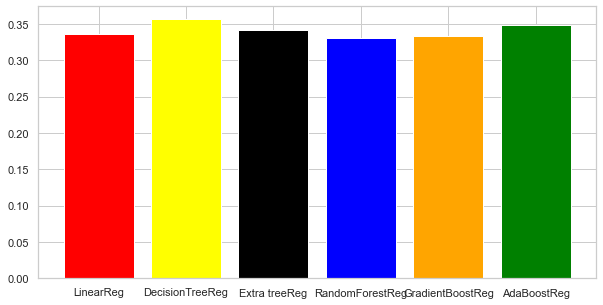

In [74]:
reg = ['LinearReg','DecisionTreeReg','Extra treeReg','RandomForestReg','GradientBoostReg','AdaBoostReg']
rmse = [rmse1,rmse2,rmse3,rmse4,rmse5,rmse6]
c = ['red', 'yellow', 'black', 'blue', 'orange','green']
plt.figure(figsize=(10, 5))
plt.bar(reg,rmse,color=c)
# we plotted using rmse value -->ie,lesser rmse value have more accuracy

In [76]:
def will_rain_fall_for_this_conditions(xq):
    
    xq["WindGustDir"]=WindGustDir_encode.transform([xq["WindGustDir"]])
    xq["WindDir9am"]=WindDir9am_encode.transform([xq["WindDir9am"]])
    xq["WindDir3pm"]=WindDir3pm_encode.transform([xq["WindDir3pm"]])
    xq["RainToday"]=RainToday_encode.transform([xq["RainToday"]])
    xq=np.array(list((xq.values())))
    final_xq = scaler.transform(xq.reshape(1, -1))
    chance=clf.predict_proba(final_xq)[:,1]
    if chance>=0.5:
        print("Yes, there is a {} % chance of rain can fall on tommorow ".format(chance*100))
    else:
        print("No, there is only {}% chance of rainfall hence we cannot expect rain on tommorow ".format(chance*100))
    print("Because today's Humidity at 3pm ={}%,Atmosphereic Pressure at 9am={}millibars,and Wind Gust Speed ={}km/hr, which are very good sign for rainfall"
          .format(Humidity3pm,Pressure9am,WindGustSpeed))

In [77]:
#Giving one query point here

MinTemp   = 26.2
MaxTemp   = 31.7
Rainfall   = 2.8
Evaporation   = 5.4
Sunshine   = 3.5
WindGustDir   = "NNW"
WindGustSpeed   = 57
WindDir9am   = "NNW"
WindDir3pm   = "NNW"
WindSpeed9am   = 20
WindSpeed3pm   = 13
Humidity9am   = 81
Humidity3pm   = 95
Pressure9am   = 1007.2
Pressure3pm   = 1006.1
Cloud9am   = 7
Cloud3pm   = 8
Temp9am   = 28.8
Temp3pm   = 25.4
RainToday   ="Yes"

In [78]:
point = [MinTemp,MaxTemp,Rainfall,
         Evaporation,Sunshine,WindGustDir,
         WindGustSpeed,WindDir9am,WindDir3pm,
         WindSpeed9am,WindSpeed3pm,Humidity9am,
         Humidity3pm,Pressure9am,Pressure3pm,
         Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday]

xq=dict()
for i,name in enumerate(column_names):
    xq[name]=point[i]

In [79]:
will_rain_fall_for_this_conditions(xq)

Yes, there is a [99.04083842] % chance of rain can fall on tommorow 
Because today's Humidity at 3pm =95%,Atmosphereic Pressure at 9am=1007.2millibars,and Wind Gust Speed =57km/hr, which are very good sign for rainfall


### Yes, there is a [99.04083842] % chance of rain can fall on tommorow 